# start

# Define gradient decent function

In [63]:
import numpy as np
from scipy.stats import expon
from scipy.optimize import minimize
vector_at_diff = []
vector_point = []
#main_function = lambda v: v-np.log(v)
def gradient_descent(
    gradient, start, learn_rate, n_iter=50, tolerance=1e-06
):
    vector = start
    for _ in range(n_iter):
        vector_at_diff.append(np.abs(vector))
        
        diff = -learn_rate * gradient(vector)
        if vector >= 0:
            vector_point.append(np.sqrt(np.abs(vector)))
        else:
            vector_point.append(-np.sqrt(np.abs(vector)))
             
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff

    return vector


# Binned likelihood

In [64]:
from iminuit import Minuit

In [65]:
np.random.seed(1)
data = np.random.exponential(scale=2.2, size=10000)
num_bins = 30
bin_counts, bin_edges = np.histogram(data, bins=num_bins + 1)
bin_width = np.diff(bin_edges)
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
def binned_likelihood(params, bin_counts, bin_edges):
    λ = params
    expected_counts = len(data) *1/λ* np.exp((-1/λ) * bin_centers)*bin_width
    log_likelihoods =  bin_counts * np.log(expected_counts)
    total_log_likelihood = np.sum(log_likelihoods)
    return total_log_likelihood

In [66]:
def fcn(tau):
    f = -2.0 * binned_likelihood(tau, bin_counts, bin_edges)
    return f
minuit = Minuit(fcn, tau=2.1)
minuit.migrad()
minuit.hesse()
tau_expected = minuit.values["tau"]

In [67]:
tau_expected

2.18874023670226

In [68]:
import matplotlib.pyplot as plt

In [4]:
#fitted_parameter = gradient_descent(
#    gradient=lambda λ: -np.sum(bin_counts*bin_width*(-1/λ)+(bin_counts*bin_width*bin_centers)
#                              /λ**2), start=3, 
#    learn_rate= .00001 , n_iter = 500000, tolerance = .0000001 )

In [69]:
fitted_parameter = tau_expected

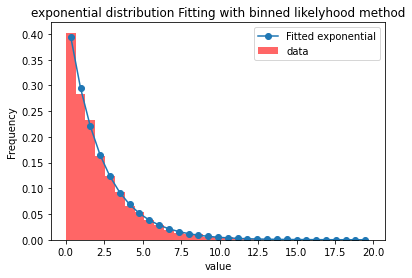

In [70]:

plt.plot(bin_centers,(1/fitted_parameter)*np.exp(-bin_centers/fitted_parameter),marker='o',linestyle = '-', label = 'Fitted exponential')
plt.hist(data, bins = len(bin_centers),density=True,alpha = .6, color ='r',label = 'data')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.title("exponential distribution Fitting with binned likelyhood method")
plt.legend()
plt.show()

# end